In [1]:
import numpy as np
import matplotlib.pyplot as plt

from blond_common.fitting.distributions import Gaussian
from blond_common.fitting.distribution import gaussianFit2

import blond_common.devtools.BLonD_Rc as blondrc

In [6]:
time_array = np.arange(0, 25, 0.1)

amplitude = 1.
position = 13
lengthParameter = 2  # RMS by default
FWHM = 2*np.sqrt(np.log(4))*lengthParameter
initial_params_gauss = [amplitude, position, lengthParameter]

In [7]:
#create a Gaussian distribution object with these parmeters
gaussian_dist = Gaussian(*initial_params_gauss)

In [8]:
# compute profile at a point
print('profile at position where profile is a half maximum: ',
      amplitude/2, gaussian_dist.profile(position+FWHM/2))
# ... or an array
gaussian_profile = gaussian_dist.profile(time_array)

profile at position where profile is a half maximum:  0.5 0.4999999999999999


input length and RMS:  2 2
resulting FWHM and FWHM:  4.709640090061899 4.709640090061899


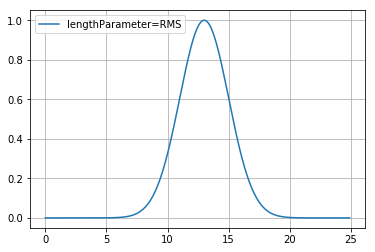

In [9]:
fig = plt.figure('Gaussian profiles', clear=True)
plt.grid()
plt.plot(time_array, gaussian_profile, label='lengthParameter=RMS')
plt.legend()
# compare input RMS and FWHM
print('input length and RMS: ', lengthParameter, gaussian_dist.RMS)
print('resulting FWHM and FWHM: ', FWHM, gaussian_dist.FWHM)


In [10]:
# fit profile to a Gaussian
fitparams_gauss = gaussianFit2(time_array, gaussian_profile)

# notice that the 3rd element is the RMS bunch length
print('fit parameters:', fitparams_gauss)

fit parameters: [ 1. 13.  2.]


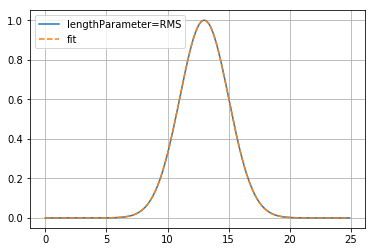

In [11]:
# the fit parameters can be used as input for a new Gaussian distribution object
gaussian_dist_fit = Gaussian(*fitparams_gauss)
gaussian_profile_fit = gaussian_dist_fit.profile(time_array)
plt.grid()
plt.plot(time_array, gaussian_profile, label='lengthParameter=RMS')
plt.plot(time_array, gaussian_profile_fit, '--', label='fit')
plt.legend()

In [12]:
# now change the default bunch length parameter to FWHM
blondrc.rc('distribution', **{'scale_factor':'FWHM'})

In [13]:
# now the 3rd argument is interpreted as FWHM, not RMS
gaussian_dist2 = Gaussian(*initial_params_gauss)
gaussian_profile2 = gaussian_dist2.profile(time_array)

length parameter is now interpreted as FWHM: 2 2.0


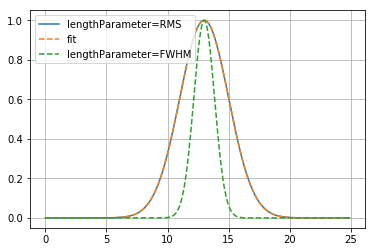

In [14]:
print('length parameter is now interpreted as FWHM:', lengthParameter,
      gaussian_dist2.FWHM)
plt.grid()
plt.plot(time_array, gaussian_profile, label='lengthParameter=RMS')
plt.plot(time_array, gaussian_profile_fit, '--', label='fit')
plt.plot(time_array, gaussian_profile2, '--', label='lengthParameter=FWHM')
plt.legend()

In [15]:
# a fit to the original profile now returns FWHM in the 3rd element
fitparams_gauss2 = gaussianFit2(time_array, gaussian_profile)
print('the fit now returns FWHM:', FWHM, fitparams_gauss2[2])

the fit now returns FWHM: 4.709640090061899 4.709640083691091


In [16]:
# since the 3rd argument is correctly interpreted as FWHM,
# using this for the creation of a Gaussian object yields the original
# the 3rd arguement is correctly interpreted as FWHM
gaussian_dist_fit2 = Gaussian(*fitparams_gauss2)
gaussian_profile_fit2 = gaussian_dist_fit2.profile(time_array[::10])

1.999999997294567 2


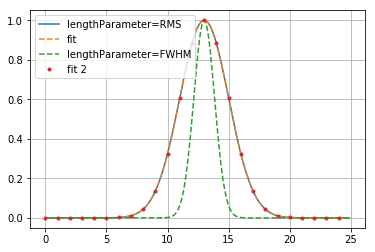

In [17]:
# ... so the actual profiles are the same
print(gaussian_dist_fit2.RMS, gaussian_dist.RMS)
plt.grid()
plt.plot(time_array, gaussian_profile, label='lengthParameter=RMS')
plt.plot(time_array, gaussian_profile_fit, '--', label='fit')
plt.plot(time_array, gaussian_profile2, '--', label='lengthParameter=FWHM')
plt.plot(time_array[::10], gaussian_profile_fit2, '.', label='fit 2')
plt.legend()